In [54]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import seaborn as sns
from pandas import Series,DataFrame
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 读取数据

In [45]:
titanic_df = pd.read_csv('titanic-data.csv')

### 探讨生还率和所在舱位等级的关系

In [46]:
#以 Pclass 来对列表分组，并取出 Survived列
Pclass_sample=titanic_df.groupby(['Pclass']).Survived



In [47]:
#获取不同等级舱位的人数
Pclass_total=Pclass_sample.count()

In [48]:
Pclass_total

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [49]:
#获取不同等级舱位的成功生还人数
Pclass_total_survived=Pclass_sample.sum()

In [50]:
Pclass_total_survived

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [60]:
Pclass_total_not_survived=Pclass_total-Pclass_total_survived

In [68]:
Pclass_total_not_survived.name='Not Survived'

In [69]:
Pclass_total_not_survived

Pclass
1     80
2     97
3    372
Name: Not Survived, dtype: int64

In [82]:
Pclass_comparison=DataFrame([Pclass_total_survived,Pclass_total_not_survived]).T


In [83]:
Pclass_comparison

,Survived,Not Survived
Pclass,,
1,136,80
2,87,97
3,119,372


In [85]:
normed_Pclass_comparison=Pclass_comparison.div(Pclass_comparison.sum(1),axis=0)

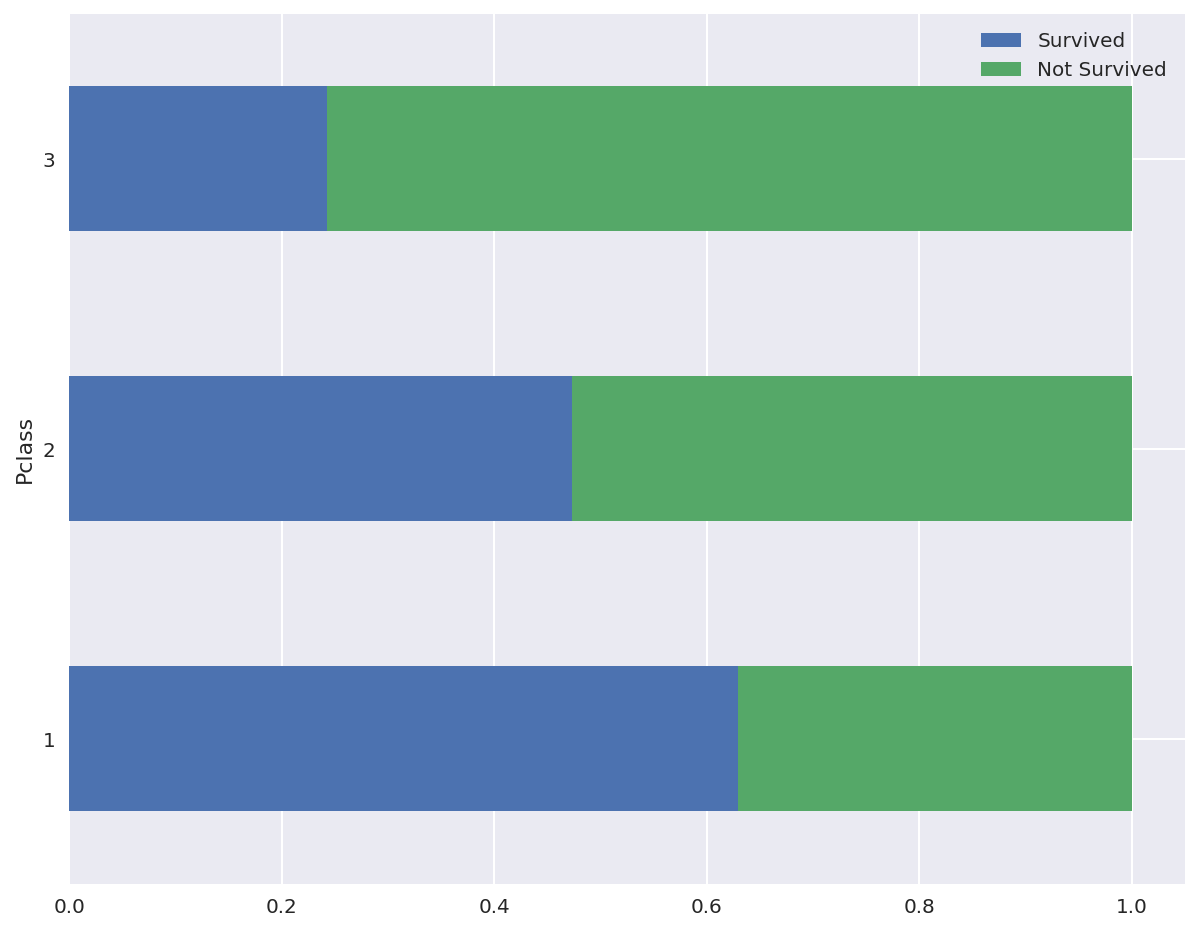

In [105]:
normed_Pclass_comparison.plot(kind='barh',stacked=True,figsize=(10,8))

In [107]:
normed_Pclass_comparison['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

### 数据结论：一等舱的生还率是63%，二等舱是47%，三等舱是24%  